## 异常检测实战task:

- 基于 anomaly_data.csv数据，可视化数据分布情况，及其对应高斯分布的概率密度函数
- 建立模型，实现异常数据点预测
- 可视化异常检测处理结果
- 修改概率分布阈值EllipticEnvelop(contamination = 0.1)中的contamination, 查看阈值改变对结果的影响

In [2]:
#load the data
import pandas as pd
import numpy as np
data = pd.read_csv('anomaly_data.csv')
data.head()

,x1,x2
0,8.046815,9.741152
1,8.408520,8.763270
2,9.195915,10.853181
3,9.914701,11.174260
4,8.576700,9.042849


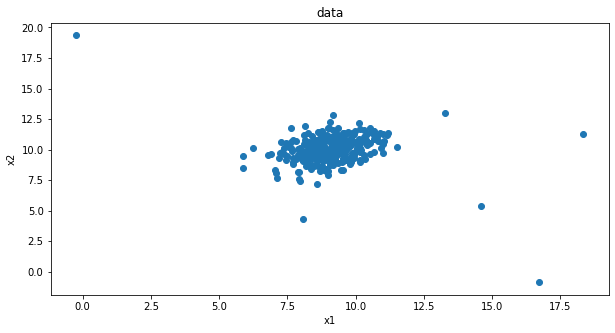

In [5]:
# visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize = (10,5))
plt.scatter(data.loc[:,'x1'],data.loc[:,'x2'])
plt.title('data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [7]:
#define x1 and x2
x1 = data.loc[:,'x1']
x2 = data.loc[:,'x2']

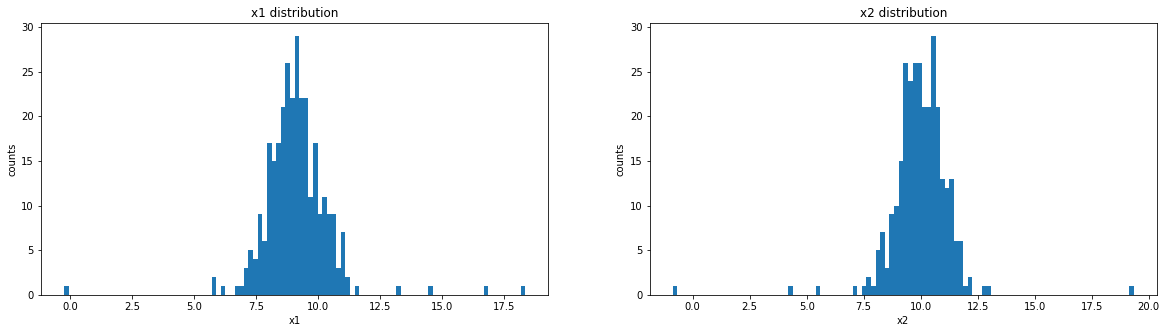

In [9]:
fig2 = plt.figure(figsize = (20,5))
plt.subplot(121)
plt.hist(x1,bins=100)
plt.title('x1 distribution')
plt.xlabel('x1')
plt.ylabel('counts')
plt.subplot(122)
plt.hist(x2,bins = 100)
plt.title('x2 distribution')
plt.xlabel('x2')
plt.ylabel('counts')
plt.show()

In [11]:
# calculate the mean and sigma of x1 and x2
x1_mean = x1.mean()
x1_sigma = x1.std()
x2_mean = x2.mean()
x2_sigma = x2.std()
print(x1_mean,x1_sigma,x2_mean,x2_sigma)

9.112225783931596 1.3559573758220915 9.997710507954398 1.30970711753864


In [14]:
# calculate the gaussian distribution p(x)
from scipy.stats import norm
x1_range = np.linspace(0,20,300)
x1_normal = norm.pdf(x1_range,x1_mean,x1_sigma)
x2_range = np.linspace(0,20,300)
x2_normal = norm.pdf(x2_range,x2_mean,x2_sigma)

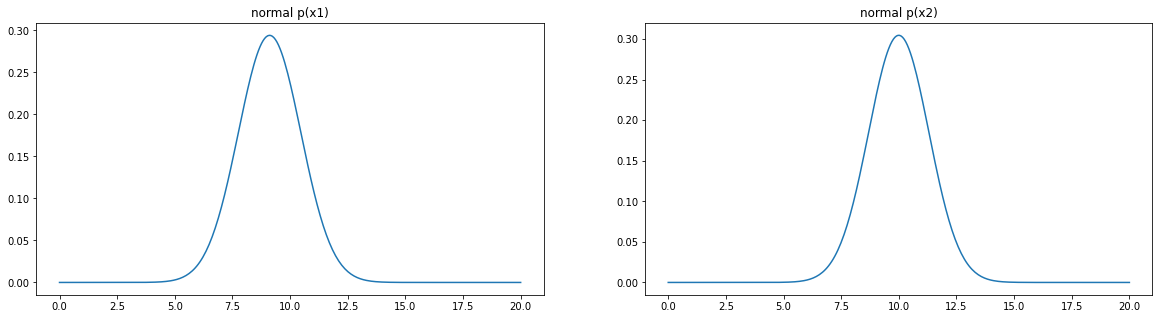

In [16]:
#visualize the p(x)
fig2 = plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(x1_range,x1_normal)
plt.title('normal p(x1)')
plt.subplot(122)
plt.plot(x2_range,x2_normal)
plt.title('normal p(x2)')
plt.show()

In [17]:
#establish the model and predict
from sklearn.covariance import EllipticEnvelope
ad_model = EllipticEnvelope()
ad_model.fit(data)

EllipticEnvelope()

In [20]:
# make prediction
y_predict = ad_model.predict(data)
print(pd.value_counts(y_predict))

 1    276
-1     31
dtype: int64


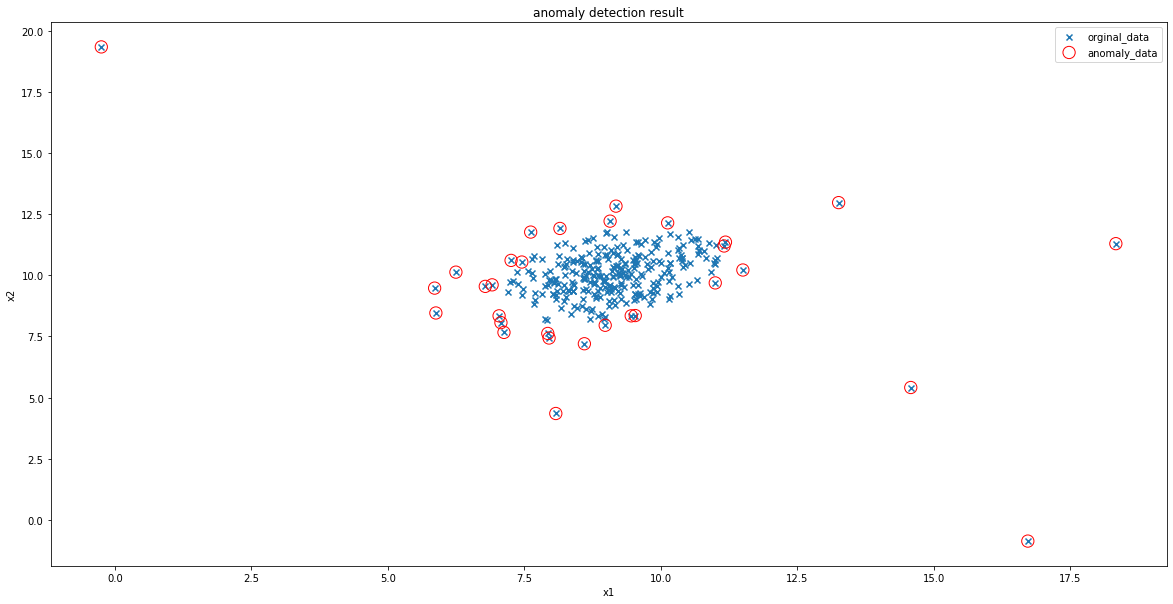

In [23]:
# visualize the result
fig4 = plt.figure(figsize=(20,10))
orginal_data = plt.scatter(data.loc[:,'x1'],data.loc[:,'x2'],marker='x')
anomaly_data = plt.scatter(data.loc[:,'x1'][y_predict == -1],data.loc[:,'x2'][y_predict == -1],marker = 'o',facecolor='none',edgecolor='red',s = 150)

plt.title('anomaly detection result')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend((orginal_data,anomaly_data),('orginal_data','anomaly_data'))
plt.show()

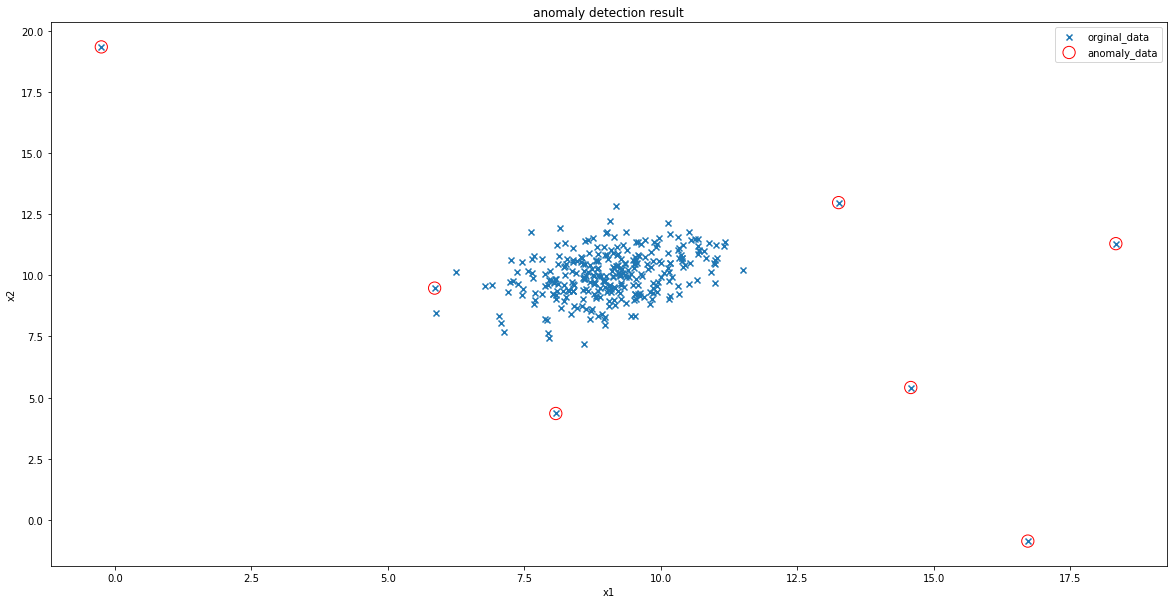

In [24]:
ad_model = EllipticEnvelope(contamination = 0.02)
ad_model.fit(data)
y_predict = ad_model.predict(data)
fig5 = plt.figure(figsize=(20,10))
orginal_data = plt.scatter(data.loc[:,'x1'],data.loc[:,'x2'],marker='x')
anomaly_data = plt.scatter(data.loc[:,'x1'][y_predict == -1],data.loc[:,'x2'][y_predict == -1],marker = 'o',facecolor='none',edgecolor='red',s = 150)

plt.title('anomaly detection result')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend((orginal_data,anomaly_data),('orginal_data','anomaly_data'))
plt.show()

## 异常检测实战summary:

- 通过计算数据各维度对应的高斯分布概率密度函数，可用于寻找到数据中的异常点；
- 通过修改概率密度阈值contamination,可调整异常点检测的灵敏度；